In [12]:
# ============================================================================
# BAGIAN 1: IMPORT LIBRARIES
# ============================================================================

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import (
    classification_report, 
    confusion_matrix, 
    accuracy_score,
    precision_score,
    recall_score,
    f1_score
)
import warnings
warnings.filterwarnings('ignore')

# Setting untuk visualisasi
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")
%matplotlib inline

print("="*80)
print("BAGIAN 1: IMPORT LIBRARIES BERHASIL ")
print("="*80)


BAGIAN 1: IMPORT LIBRARIES BERHASIL 


In [2]:
# ============================================================================
# BAGIAN 2: LOAD DATA DAN PEMERIKSAAN AWAL
# ============================================================================

print("\n" + "="*80)
print("BAGIAN 2: LOAD DATA DAN PEMERIKSAAN AWAL")
print("="*80)

# Load dataset
# CATATAN: Sesuaikan path dengan lokasi file Anda
# Jika menggunakan Kaggle, gunakan: '/kaggle/input/pima-indians-diabetes-database/diabetes.csv'
# Jika menggunakan Google Colab, upload file terlebih dahulu

df = pd.read_csv('diabetes.csv')

print("\n[INFO] Dataset berhasil dimuat!")
print(f"Jumlah baris: {df.shape[0]}")
print(f"Jumlah kolom: {df.shape[1]}")

# Menampilkan 5 baris pertama
print("\n5 Baris Pertama Dataset:")
print(df.head())

# Informasi struktur data
print("\nInformasi Dataset:")
print(df.info())

# Statistik deskriptif
print("\nStatistik Deskriptif:")
print(df.describe())

# Cek missing values
print("\nCek Missing Values:")
print(df.isnull().sum())

# Cek duplikasi
print(f"\nJumlah Data Duplikat: {df.duplicated().sum()}")

# Distribusi kelas target
print("\nDistribusi Kelas Target (Outcome):")
print(df['Outcome'].value_counts())
print("\nPersentase:")
print(df['Outcome'].value_counts(normalize=True) * 100)



BAGIAN 2: LOAD DATA DAN PEMERIKSAAN AWAL

[INFO] Dataset berhasil dimuat!
Jumlah baris: 768
Jumlah kolom: 9

5 Baris Pertama Dataset:
   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  

Informasi Dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Coun


BAGIAN 3: EXPLORATORY DATA ANALYSIS (EDA)


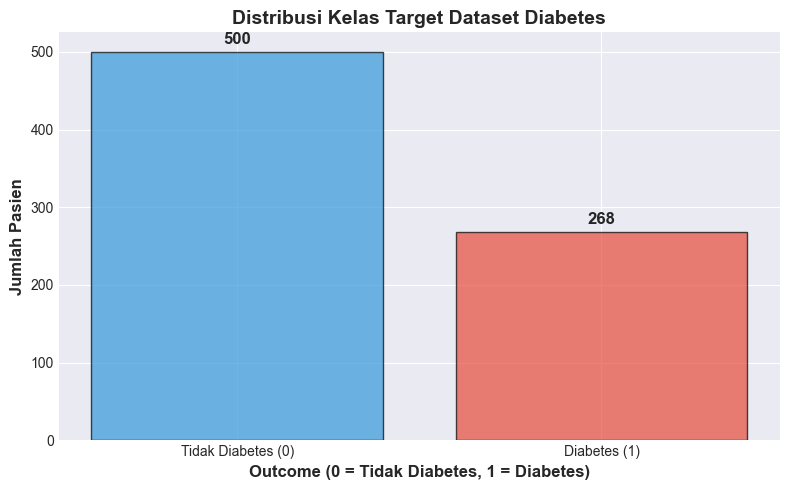

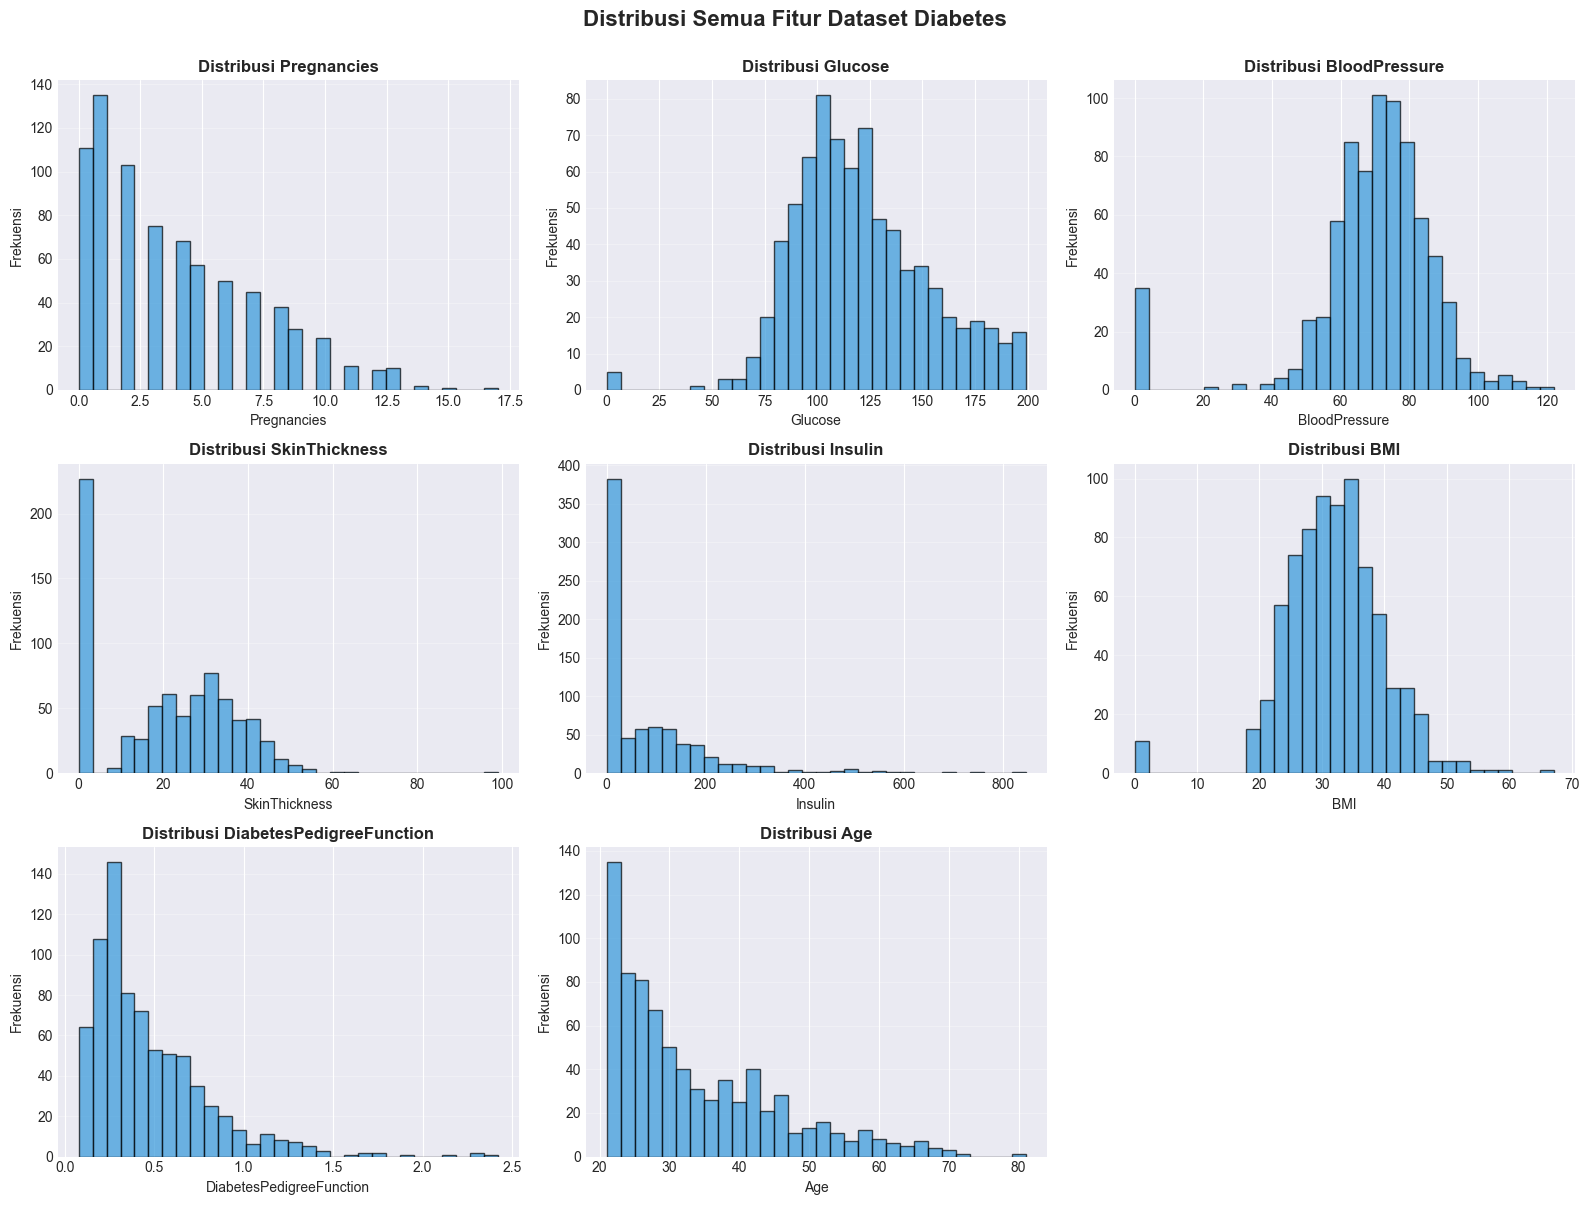

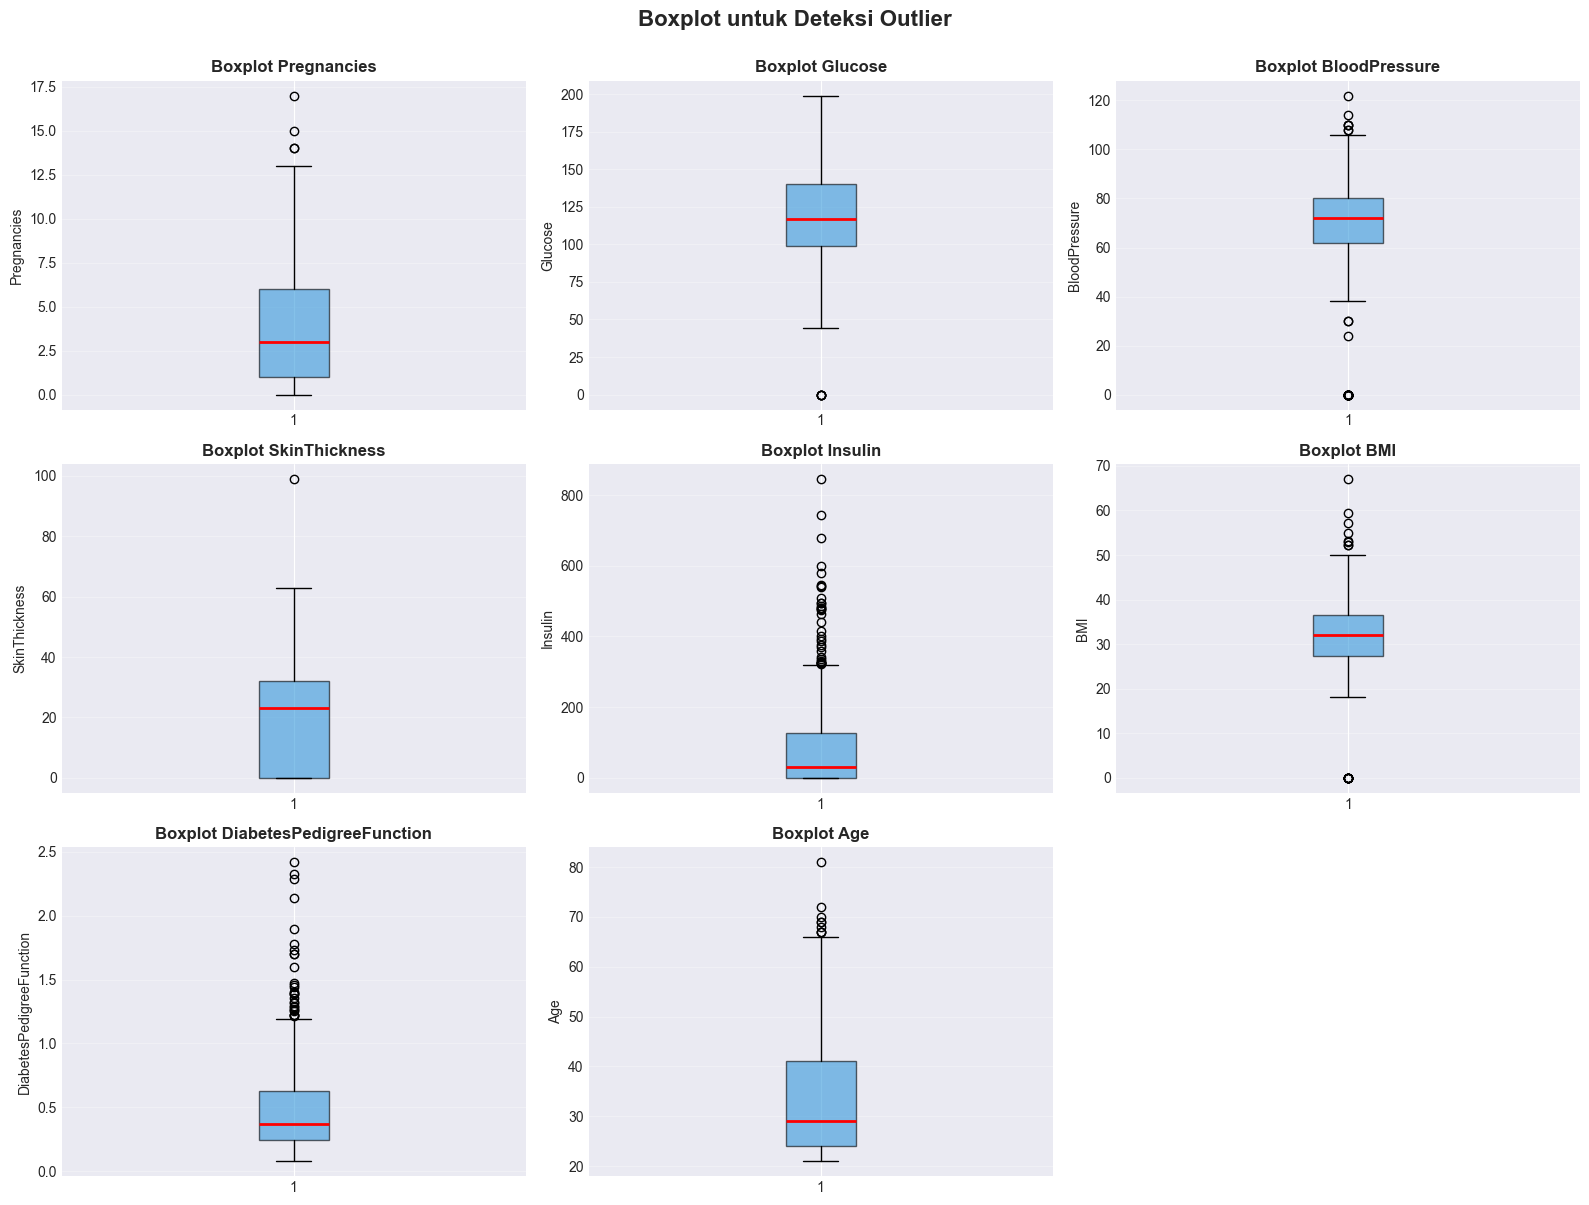

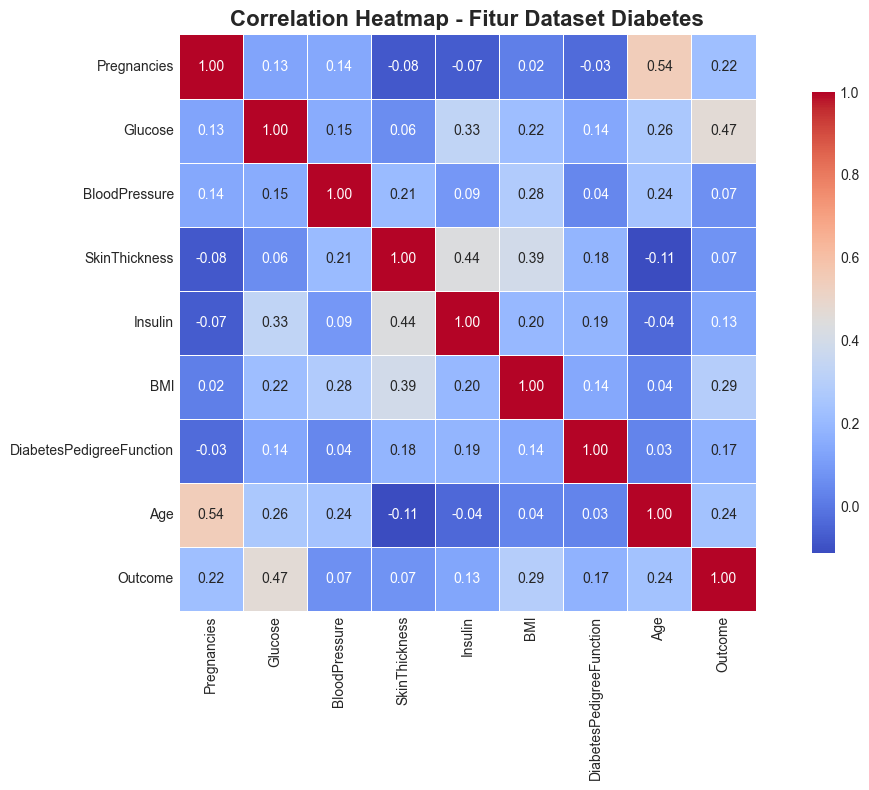


[ANALISIS KORELASI]
Korelasi fitur terhadap Outcome (Target):
Outcome                     1.000000
Glucose                     0.466581
BMI                         0.292695
Age                         0.238356
Pregnancies                 0.221898
DiabetesPedigreeFunction    0.173844
Insulin                     0.130548
SkinThickness               0.074752
BloodPressure               0.065068
Name: Outcome, dtype: float64

[INFO] Membuat Pairplot untuk 4 fitur dengan korelasi tertinggi terhadap Outcome...


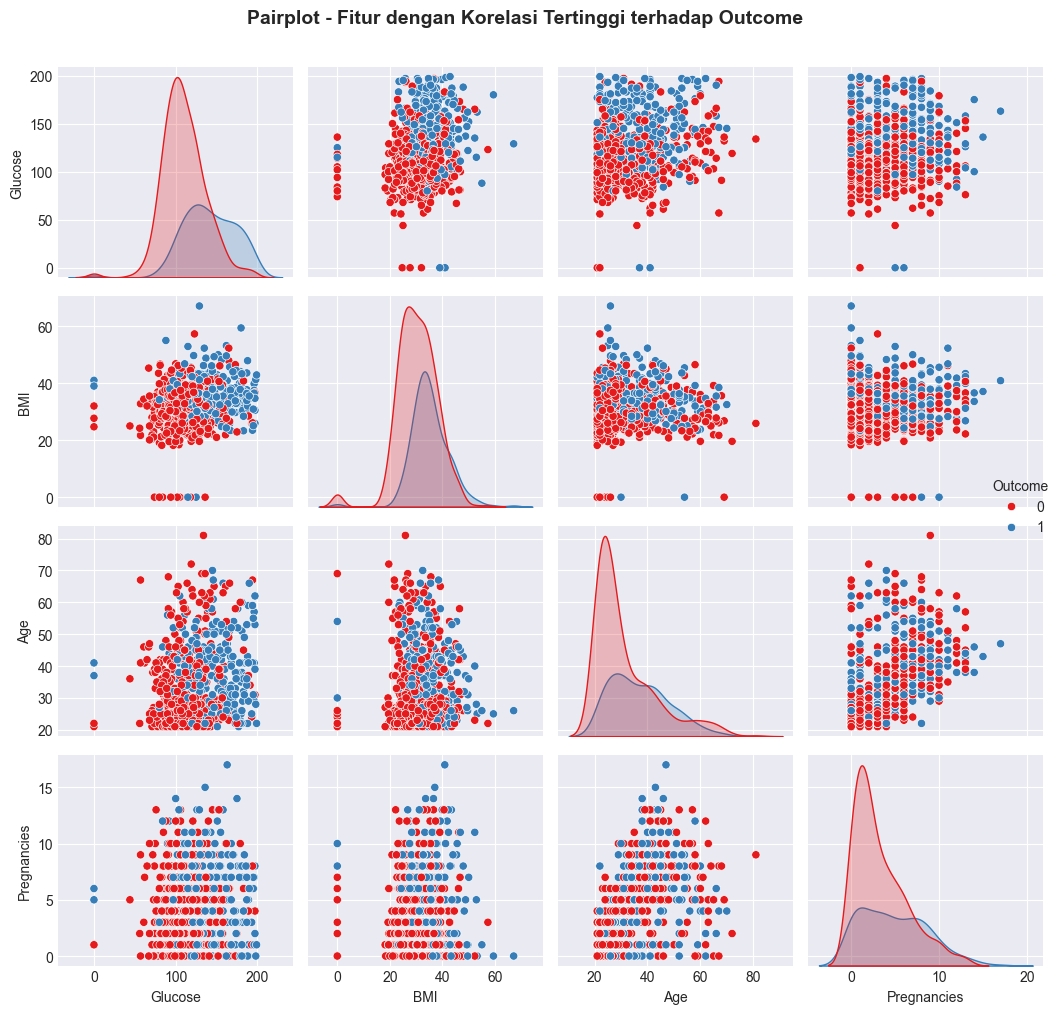

In [3]:
# ============================================================================
# BAGIAN 3: EXPLORATORY DATA ANALYSIS (EDA)
# ============================================================================

print("\n" + "="*80)
print("BAGIAN 3: EXPLORATORY DATA ANALYSIS (EDA)")
print("="*80)

# 3.1 Distribusi Kelas Target
plt.figure(figsize=(8, 5))
target_counts = df['Outcome'].value_counts()
colors = ['#3498db', '#e74c3c']
plt.bar(target_counts.index, target_counts.values, color=colors, edgecolor='black', alpha=0.7)
plt.xlabel('Outcome (0 = Tidak Diabetes, 1 = Diabetes)', fontsize=12, fontweight='bold')
plt.ylabel('Jumlah Pasien', fontsize=12, fontweight='bold')
plt.title('Distribusi Kelas Target Dataset Diabetes', fontsize=14, fontweight='bold')
plt.xticks([0, 1], ['Tidak Diabetes (0)', 'Diabetes (1)'])
for i, v in enumerate(target_counts.values):
    plt.text(i, v + 10, str(v), ha='center', fontweight='bold', fontsize=12)
plt.tight_layout()
plt.show()

# 3.2 Distribusi Fitur Numerik
fig, axes = plt.subplots(3, 3, figsize=(16, 12))
axes = axes.ravel()

features = df.columns[:-1]  # Semua kolom kecuali 'Outcome'

for idx, feature in enumerate(features):
    axes[idx].hist(df[feature], bins=30, color='#3498db', edgecolor='black', alpha=0.7)
    axes[idx].set_title(f'Distribusi {feature}', fontsize=12, fontweight='bold')
    axes[idx].set_xlabel(feature, fontsize=10)
    axes[idx].set_ylabel('Frekuensi', fontsize=10)
    axes[idx].grid(axis='y', alpha=0.3)

# Hapus subplot kosong
fig.delaxes(axes[8])

plt.suptitle('Distribusi Semua Fitur Dataset Diabetes', fontsize=16, fontweight='bold', y=1.00)
plt.tight_layout()
plt.show()

# 3.3 Boxplot untuk Deteksi Outlier
fig, axes = plt.subplots(3, 3, figsize=(16, 12))
axes = axes.ravel()

for idx, feature in enumerate(features):
    axes[idx].boxplot(df[feature], vert=True, patch_artist=True,
                      boxprops=dict(facecolor='#3498db', alpha=0.6),
                      medianprops=dict(color='red', linewidth=2))
    axes[idx].set_title(f'Boxplot {feature}', fontsize=12, fontweight='bold')
    axes[idx].set_ylabel(feature, fontsize=10)
    axes[idx].grid(axis='y', alpha=0.3)

fig.delaxes(axes[8])

plt.suptitle('Boxplot untuk Deteksi Outlier', fontsize=16, fontweight='bold', y=1.00)
plt.tight_layout()
plt.show()

# 3.4 Correlation Heatmap
plt.figure(figsize=(12, 8))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', 
            square=True, linewidths=0.5, cbar_kws={"shrink": 0.8})
plt.title('Correlation Heatmap - Fitur Dataset Diabetes', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

print("\n[ANALISIS KORELASI]")
print("Korelasi fitur terhadap Outcome (Target):")
print(correlation_matrix['Outcome'].sort_values(ascending=False))

# 3.5 Pairplot untuk Fitur Penting
print("\n[INFO] Membuat Pairplot untuk 4 fitur dengan korelasi tertinggi terhadap Outcome...")
top_features = correlation_matrix['Outcome'].abs().sort_values(ascending=False)[1:5].index.tolist()
top_features.append('Outcome')

sns.pairplot(df[top_features], hue='Outcome', palette='Set1', diag_kind='kde', height=2.5)
plt.suptitle('Pairplot - Fitur dengan Korelasi Tertinggi terhadap Outcome', 
             fontsize=14, fontweight='bold', y=1.01)
plt.tight_layout()
plt.show()



BAGIAN 4: DATA PREPROCESSING

[INFO] Handling Zero Values pada fitur tertentu...
Jumlah nilai 0 sebelum preprocessing:
Glucose: 5 nilai 0
BloodPressure: 35 nilai 0
SkinThickness: 227 nilai 0
Insulin: 374 nilai 0
BMI: 11 nilai 0

Jumlah nilai 0 setelah preprocessing:
Glucose: 0 nilai 0
BloodPressure: 0 nilai 0
SkinThickness: 0 nilai 0
Insulin: 0 nilai 0
BMI: 0 nilai 0

[INFO] Pemisahan fitur dan target berhasil!
Shape X (Features): (768, 8)
Shape y (Target): (768,)

[INFO] Data berhasil dibagi menjadi Training dan Testing Set!
Training Set: 614 samples (79.9%)
Testing Set: 154 samples (20.1%)

Distribusi kelas di Training Set:
Outcome
0    400
1    214
Name: count, dtype: int64

Distribusi kelas di Testing Set:
Outcome
0    100
1     54
Name: count, dtype: int64

[INFO] Feature Scaling selesai menggunakan StandardScaler!
Mean sebelum scaling (X_train): 53.83
Std sebelum scaling (X_train): 19.03

Mean setelah scaling (X_train_scaled): -0.00
Std setelah scaling (X_train_scaled): 1.00


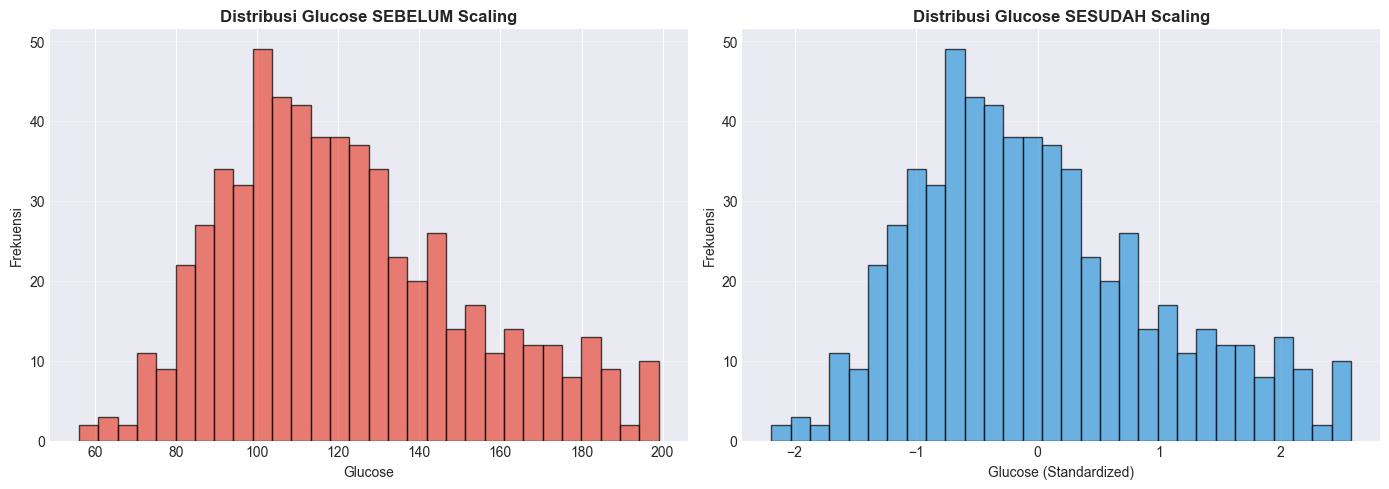

In [4]:
# ============================================================================
# BAGIAN 4: DATA PREPROCESSING
# ============================================================================

print("\n" + "="*80)
print("BAGIAN 4: DATA PREPROCESSING")
print("="*80)

# 4.1 Handling Zero Values
# Beberapa fitur tidak boleh bernilai 0 secara medis (Glucose, BloodPressure, dll)
# Kita akan mengganti nilai 0 dengan median dari kolom tersebut

columns_with_zero = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']

print("\n[INFO] Handling Zero Values pada fitur tertentu...")
print("Jumlah nilai 0 sebelum preprocessing:")
for col in columns_with_zero:
    print(f"{col}: {(df[col] == 0).sum()} nilai 0")

# Ganti 0 dengan NaN, lalu isi dengan median
for col in columns_with_zero:
    df[col] = df[col].replace(0, np.nan)
    median_value = df[col].median()
    df[col].fillna(median_value, inplace=True)

print("\nJumlah nilai 0 setelah preprocessing:")
for col in columns_with_zero:
    print(f"{col}: {(df[col] == 0).sum()} nilai 0")

# 4.2 Pemisahan Fitur (X) dan Target (y)
X = df.drop('Outcome', axis=1)
y = df['Outcome']

print(f"\n[INFO] Pemisahan fitur dan target berhasil!")
print(f"Shape X (Features): {X.shape}")
print(f"Shape y (Target): {y.shape}")

# 4.3 Train-Test Split (SEBELUM Scaling)
# PENTING: Split dulu, baru scaling untuk menghindari data leakage

X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    test_size=0.2,  # 80% training, 20% testing
    random_state=42,
    stratify=y  # Memastikan proporsi kelas seimbang di train dan test
)

print(f"\n[INFO] Data berhasil dibagi menjadi Training dan Testing Set!")
print(f"Training Set: {X_train.shape[0]} samples ({X_train.shape[0]/len(X)*100:.1f}%)")
print(f"Testing Set: {X_test.shape[0]} samples ({X_test.shape[0]/len(X)*100:.1f}%)")
print(f"\nDistribusi kelas di Training Set:\n{y_train.value_counts()}")
print(f"\nDistribusi kelas di Testing Set:\n{y_test.value_counts()}")

# 4.4 Feature Scaling (StandardScaler)
# WAJIB untuk KNN karena algoritma ini berbasis jarak Euclidean

scaler = StandardScaler()

# Fit scaler pada training data SAJA, lalu transform train dan test
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print(f"\n[INFO] Feature Scaling selesai menggunakan StandardScaler!")
print(f"Mean sebelum scaling (X_train): {X_train.mean().mean():.2f}")
print(f"Std sebelum scaling (X_train): {X_train.std().mean():.2f}")
print(f"\nMean setelah scaling (X_train_scaled): {X_train_scaled.mean():.2f}")
print(f"Std setelah scaling (X_train_scaled): {X_train_scaled.std():.2f}")

# Visualisasi sebelum dan sesudah scaling untuk 1 fitur
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Sebelum scaling
axes[0].hist(X_train['Glucose'], bins=30, color='#e74c3c', edgecolor='black', alpha=0.7)
axes[0].set_title('Distribusi Glucose SEBELUM Scaling', fontsize=12, fontweight='bold')
axes[0].set_xlabel('Glucose', fontsize=10)
axes[0].set_ylabel('Frekuensi', fontsize=10)
axes[0].grid(axis='y', alpha=0.3)

# Sesudah scaling
axes[1].hist(X_train_scaled[:, 1], bins=30, color='#3498db', edgecolor='black', alpha=0.7)
axes[1].set_title('Distribusi Glucose SESUDAH Scaling', fontsize=12, fontweight='bold')
axes[1].set_xlabel('Glucose (Standardized)', fontsize=10)
axes[1].set_ylabel('Frekuensi', fontsize=10)
axes[1].grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()



BAGIAN 5: EKSPERIMEN MENCARI NILAI K OPTIMAL

[INFO] Melakukan eksperimen dengan K dari 1 hingga 40...
Ini mungkin memakan waktu beberapa detik...

[INFO] Eksperimen selesai!

[HASIL EKSPERIMEN]
Nilai K Optimal: 8
Error Rate Terendah: 0.2338
Accuracy Tertinggi: 0.7662


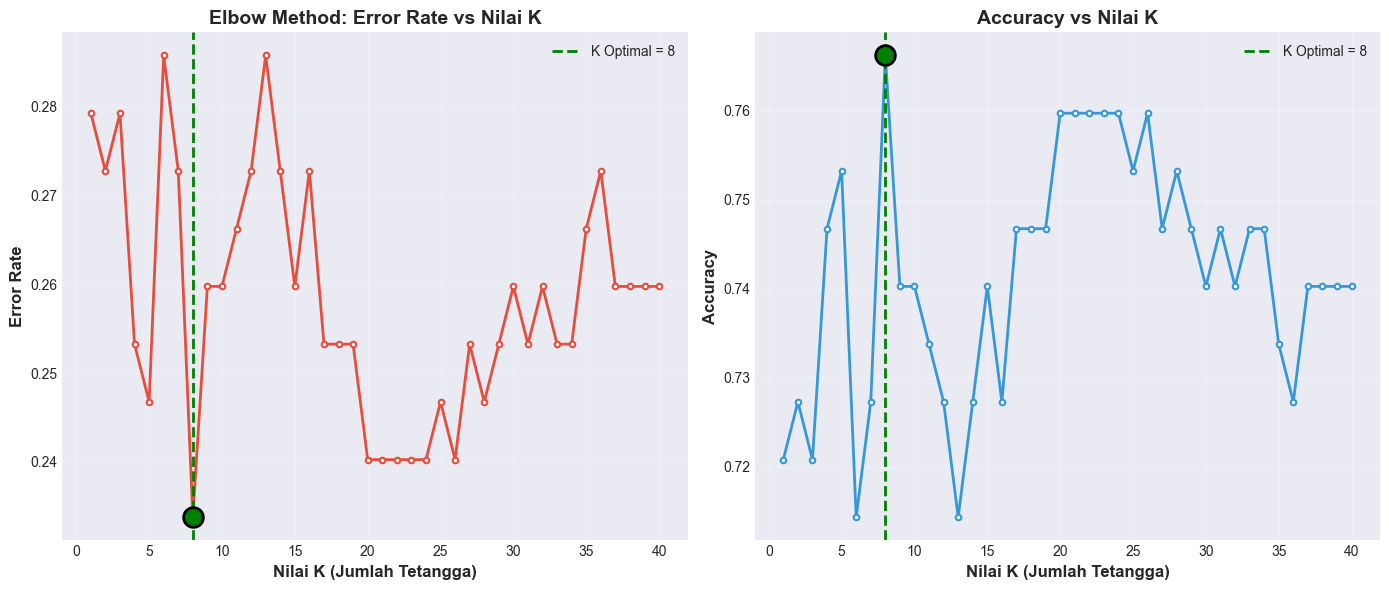


Tabel Hasil untuk beberapa nilai K:
 K  Error Rate  Accuracy
 1    0.279221  0.720779
 2    0.272727  0.727273
 3    0.279221  0.720779
 4    0.253247  0.746753
 5    0.246753  0.753247
 6    0.285714  0.714286
 7    0.272727  0.727273
 8    0.233766  0.766234
 9    0.259740  0.740260
10    0.259740  0.740260
11    0.266234  0.733766
12    0.272727  0.727273
13    0.285714  0.714286
14    0.272727  0.727273
15    0.259740  0.740260
16    0.272727  0.727273
17    0.253247  0.746753
18    0.253247  0.746753
19    0.253247  0.746753
20    0.240260  0.759740


In [5]:
# ============================================================================
# BAGIAN 5: EKSPERIMEN MENCARI NILAI K OPTIMAL (ELBOW METHOD)
# ============================================================================

print("\n" + "="*80)
print("BAGIAN 5: EKSPERIMEN MENCARI NILAI K OPTIMAL")
print("="*80)

print("\n[INFO] Melakukan eksperimen dengan K dari 1 hingga 40...")
print("Ini mungkin memakan waktu beberapa detik...\n")

# Range nilai K yang akan dicoba
k_range = range(1, 41)

# List untuk menyimpan error rate
error_rates = []
accuracy_scores = []

# Loop untuk setiap nilai K
for k in k_range:
    # Inisialisasi model KNN
    knn = KNeighborsClassifier(n_neighbors=k, metric='euclidean')
    
    # Training model
    knn.fit(X_train_scaled, y_train)
    
    # Prediksi
    y_pred = knn.predict(X_test_scaled)
    
    # Hitung error rate dan accuracy
    error_rate = np.mean(y_pred != y_test)
    accuracy = accuracy_score(y_test, y_pred)
    
    error_rates.append(error_rate)
    accuracy_scores.append(accuracy)

print("[INFO] Eksperimen selesai!\n")

# Cari K dengan error rate terendah
optimal_k = k_range[np.argmin(error_rates)]
min_error = min(error_rates)
max_accuracy = max(accuracy_scores)

print(f"[HASIL EKSPERIMEN]")
print(f"Nilai K Optimal: {optimal_k}")
print(f"Error Rate Terendah: {min_error:.4f}")
print(f"Accuracy Tertinggi: {max_accuracy:.4f}")

# Visualisasi Error Rate vs K
plt.figure(figsize=(14, 6))

# Subplot 1: Error Rate
plt.subplot(1, 2, 1)
plt.plot(k_range, error_rates, color='#e74c3c', linewidth=2, marker='o', 
         markersize=4, markerfacecolor='white', markeredgewidth=1.5)
plt.axvline(x=optimal_k, color='green', linestyle='--', linewidth=2, 
            label=f'K Optimal = {optimal_k}')
plt.scatter([optimal_k], [min_error], color='green', s=200, zorder=5, 
            edgecolors='black', linewidths=2)
plt.xlabel('Nilai K (Jumlah Tetangga)', fontsize=12, fontweight='bold')
plt.ylabel('Error Rate', fontsize=12, fontweight='bold')
plt.title('Elbow Method: Error Rate vs Nilai K', fontsize=14, fontweight='bold')
plt.legend(fontsize=10)
plt.grid(alpha=0.3)

# Subplot 2: Accuracy
plt.subplot(1, 2, 2)
plt.plot(k_range, accuracy_scores, color='#3498db', linewidth=2, marker='o', 
         markersize=4, markerfacecolor='white', markeredgewidth=1.5)
plt.axvline(x=optimal_k, color='green', linestyle='--', linewidth=2, 
            label=f'K Optimal = {optimal_k}')
plt.scatter([optimal_k], [max_accuracy], color='green', s=200, zorder=5, 
            edgecolors='black', linewidths=2)
plt.xlabel('Nilai K (Jumlah Tetangga)', fontsize=12, fontweight='bold')
plt.ylabel('Accuracy', fontsize=12, fontweight='bold')
plt.title('Accuracy vs Nilai K', fontsize=14, fontweight='bold')
plt.legend(fontsize=10)
plt.grid(alpha=0.3)

plt.tight_layout()
plt.show()

# Tabel hasil untuk beberapa nilai K
print("\nTabel Hasil untuk beberapa nilai K:")
results_df = pd.DataFrame({
    'K': list(k_range)[:20],
    'Error Rate': error_rates[:20],
    'Accuracy': accuracy_scores[:20]
})
print(results_df.to_string(index=False))


In [6]:
# ============================================================================
# BAGIAN 6: IMPLEMENTASI MODEL FINAL DENGAN K OPTIMAL
# ============================================================================

print("\n" + "="*80)
print("BAGIAN 6: IMPLEMENTASI MODEL FINAL DAN EVALUASI")
print("="*80)

# Inisialisasi model KNN dengan K optimal
knn_final = KNeighborsClassifier(
    n_neighbors=optimal_k,
    metric='euclidean',
    weights='uniform'  # Semua tetangga memiliki bobot yang sama
)

print(f"\n[INFO] Training model KNN dengan K={optimal_k}...")
knn_final.fit(X_train_scaled, y_train)
print("[INFO] Training selesai!")

# Prediksi pada test set
y_pred_final = knn_final.predict(X_test_scaled)


BAGIAN 6: IMPLEMENTASI MODEL FINAL DAN EVALUASI

[INFO] Training model KNN dengan K=8...
[INFO] Training selesai!



BAGIAN 7: EVALUASI PERFORMA MODEL


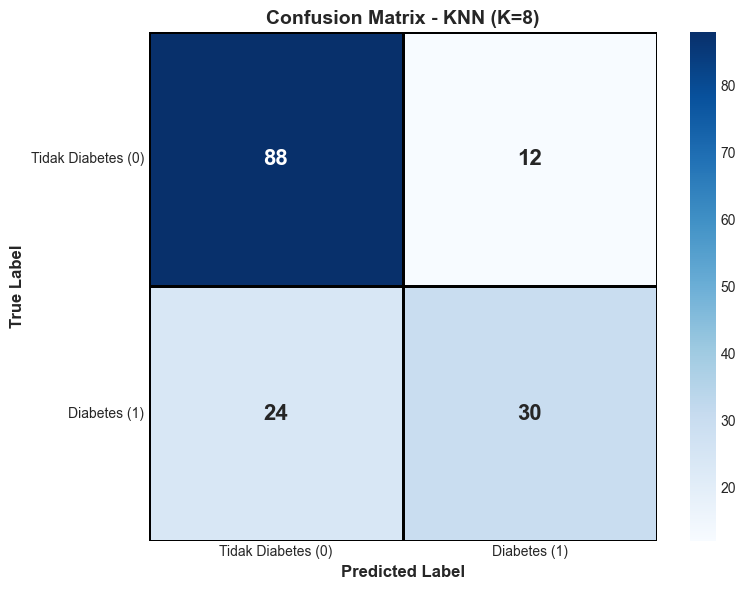


[CONFUSION MATRIX BREAKDOWN]
True Negative (TN): 88 - Diprediksi Tidak Diabetes, Aktual Tidak Diabetes ✓
False Positive (FP): 12 - Diprediksi Diabetes, Aktual Tidak Diabetes ✗
False Negative (FN): 24 - Diprediksi Tidak Diabetes, Aktual Diabetes ✗
True Positive (TP): 30 - Diprediksi Diabetes, Aktual Diabetes ✓

CLASSIFICATION REPORT
                    precision    recall  f1-score   support

Tidak Diabetes (0)       0.79      0.88      0.83       100
      Diabetes (1)       0.71      0.56      0.62        54

          accuracy                           0.77       154
         macro avg       0.75      0.72      0.73       154
      weighted avg       0.76      0.77      0.76       154


[METRIK EVALUASI DETAIL]
Accuracy  : 0.7662 (76.62%)
Precision : 0.7143 (71.43%)
Recall    : 0.5556 (55.56%)
F1-Score  : 0.6250 (62.50%)


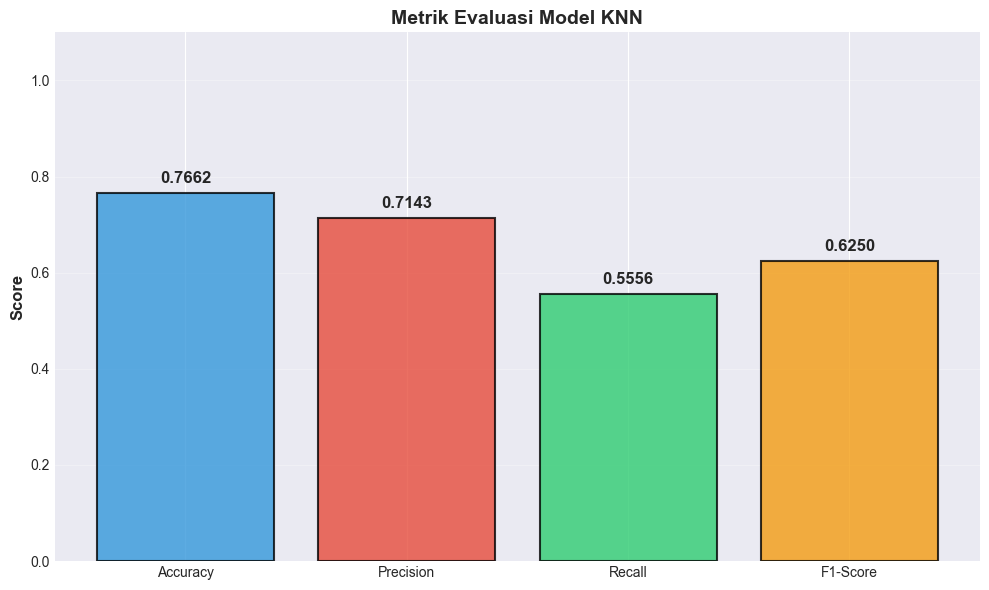


INTERPRETASI HASIL EVALUASI

[INTERPRETASI]

1. ACCURACY (76.62%):
   - Model memprediksi dengan benar 76.62% dari seluruh kasus.
   - Dari 154 pasien, 118 diprediksi dengan benar.

2. PRECISION (71.43%):
   - Ketika model memprediksi seseorang "Diabetes Positif", kemungkinan 
     prediksi tersebut benar adalah 71.43%.
   - Dari 42 prediksi positif, 30 benar-benar diabetes.

3. RECALL (55.56%):
   - Model berhasil mendeteksi 55.56% dari seluruh kasus diabetes yang sebenarnya.
   - Dari 54 pasien diabetes aktual, 30 berhasil terdeteksi.
   - 24 kasus diabetes tidak terdeteksi (False Negative) - INI PENTING UNTUK MEDIS!

4. F1-SCORE (62.50%):
   - Keseimbangan antara Precision dan Recall adalah 62.50%.
   - Skor ini memberikan gambaran performa keseluruhan yang lebih balanced.

[ANALISIS KLINIS]
False Negative (FN = 24) adalah kasus yang paling berbahaya dalam konteks medis,
karena pasien diabetes tidak terdeteksi dan tidak mendapat treatment.



In [7]:
# ============================================================================
# BAGIAN 7: EVALUASI MODEL
# ============================================================================

print("\n" + "="*80)
print("BAGIAN 7: EVALUASI PERFORMA MODEL")
print("="*80)

# 7.1 Confusion Matrix
cm = confusion_matrix(y_test, y_pred_final)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=True, 
            square=True, linewidths=2, linecolor='black',
            annot_kws={'fontsize': 16, 'fontweight': 'bold'})
plt.xlabel('Predicted Label', fontsize=12, fontweight='bold')
plt.ylabel('True Label', fontsize=12, fontweight='bold')
plt.title(f'Confusion Matrix - KNN (K={optimal_k})', fontsize=14, fontweight='bold')
plt.xticks([0.5, 1.5], ['Tidak Diabetes (0)', 'Diabetes (1)'])
plt.yticks([0.5, 1.5], ['Tidak Diabetes (0)', 'Diabetes (1)'], rotation=0)
plt.tight_layout()
plt.show()

# Ekstraksi nilai dari confusion matrix
tn, fp, fn, tp = cm.ravel()

print("\n[CONFUSION MATRIX BREAKDOWN]")
print(f"True Negative (TN): {tn} - Diprediksi Tidak Diabetes, Aktual Tidak Diabetes ✓")
print(f"False Positive (FP): {fp} - Diprediksi Diabetes, Aktual Tidak Diabetes ✗")
print(f"False Negative (FN): {fn} - Diprediksi Tidak Diabetes, Aktual Diabetes ✗")
print(f"True Positive (TP): {tp} - Diprediksi Diabetes, Aktual Diabetes ✓")

# 7.2 Classification Report
print("\n" + "="*80)
print("CLASSIFICATION REPORT")
print("="*80)
print(classification_report(y_test, y_pred_final, 
                          target_names=['Tidak Diabetes (0)', 'Diabetes (1)']))

# 7.3 Metrik Evaluasi Detail
accuracy = accuracy_score(y_test, y_pred_final)
precision = precision_score(y_test, y_pred_final)
recall = recall_score(y_test, y_pred_final)
f1 = f1_score(y_test, y_pred_final)

print("\n[METRIK EVALUASI DETAIL]")
print(f"Accuracy  : {accuracy:.4f} ({accuracy*100:.2f}%)")
print(f"Precision : {precision:.4f} ({precision*100:.2f}%)")
print(f"Recall    : {recall:.4f} ({recall*100:.2f}%)")
print(f"F1-Score  : {f1:.4f} ({f1*100:.2f}%)")

# Visualisasi metrik
metrics = ['Accuracy', 'Precision', 'Recall', 'F1-Score']
values = [accuracy, precision, recall, f1]

plt.figure(figsize=(10, 6))
bars = plt.bar(metrics, values, color=['#3498db', '#e74c3c', '#2ecc71', '#f39c12'], 
               edgecolor='black', linewidth=1.5, alpha=0.8)
plt.ylim(0, 1.1)
plt.ylabel('Score', fontsize=12, fontweight='bold')
plt.title('Metrik Evaluasi Model KNN', fontsize=14, fontweight='bold')
plt.grid(axis='y', alpha=0.3)

# Tambahkan nilai di atas bar
for bar, value in zip(bars, values):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.02, 
             f'{value:.4f}', ha='center', fontsize=12, fontweight='bold')

plt.tight_layout()
plt.show()

# 7.4 Interpretasi Hasil
print("\n" + "="*80)
print("INTERPRETASI HASIL EVALUASI")
print("="*80)

print(f"""
[INTERPRETASI]

1. ACCURACY ({accuracy*100:.2f}%):
   - Model memprediksi dengan benar {accuracy*100:.2f}% dari seluruh kasus.
   - Dari {len(y_test)} pasien, {int(accuracy*len(y_test))} diprediksi dengan benar.

2. PRECISION ({precision*100:.2f}%):
   - Ketika model memprediksi seseorang "Diabetes Positif", kemungkinan 
     prediksi tersebut benar adalah {precision*100:.2f}%.
   - Dari {tp+fp} prediksi positif, {tp} benar-benar diabetes.

3. RECALL ({recall*100:.2f}%):
   - Model berhasil mendeteksi {recall*100:.2f}% dari seluruh kasus diabetes yang sebenarnya.
   - Dari {tp+fn} pasien diabetes aktual, {tp} berhasil terdeteksi.
   - {fn} kasus diabetes tidak terdeteksi (False Negative) - INI PENTING UNTUK MEDIS!

4. F1-SCORE ({f1*100:.2f}%):
   - Keseimbangan antara Precision dan Recall adalah {f1*100:.2f}%.
   - Skor ini memberikan gambaran performa keseluruhan yang lebih balanced.

[ANALISIS KLINIS]
False Negative (FN = {fn}) adalah kasus yang paling berbahaya dalam konteks medis,
karena pasien diabetes tidak terdeteksi dan tidak mendapat treatment.
""")



BAGIAN 8: SIMULASI PREDIKSI UNTUK PASIEN BARU

[DATA PASIEN BARU]
   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            2      120             70             20       80  25.0   
1            6      180             90             35      120  35.5   
2            0       85             66             18        0  22.5   

   DiabetesPedigreeFunction  Age  
0                      0.35   30  
1                      0.85   55  
2                      0.20   25  

HASIL PREDIKSI UNTUK PASIEN BARU

PASIEN 1:
  Usia: 30 tahun
  Glukosa: 120 mg/dL
  BMI: 25.0
  ─────────────────────────────────
  Prediksi: TIDAK DIABETES ✓
  Probabilitas Tidak Diabetes: 75.00%
  Probabilitas Diabetes: 25.00%

PASIEN 2:
  Usia: 55 tahun
  Glukosa: 180 mg/dL
  BMI: 35.5
  ─────────────────────────────────
  Prediksi: DIABETES POSITIF ⚠️
  Probabilitas Tidak Diabetes: 0.00%
  Probabilitas Diabetes: 100.00%

PASIEN 3:
  Usia: 25 tahun
  Glukosa: 85 mg/dL
  BMI: 22.5
  ─────────────

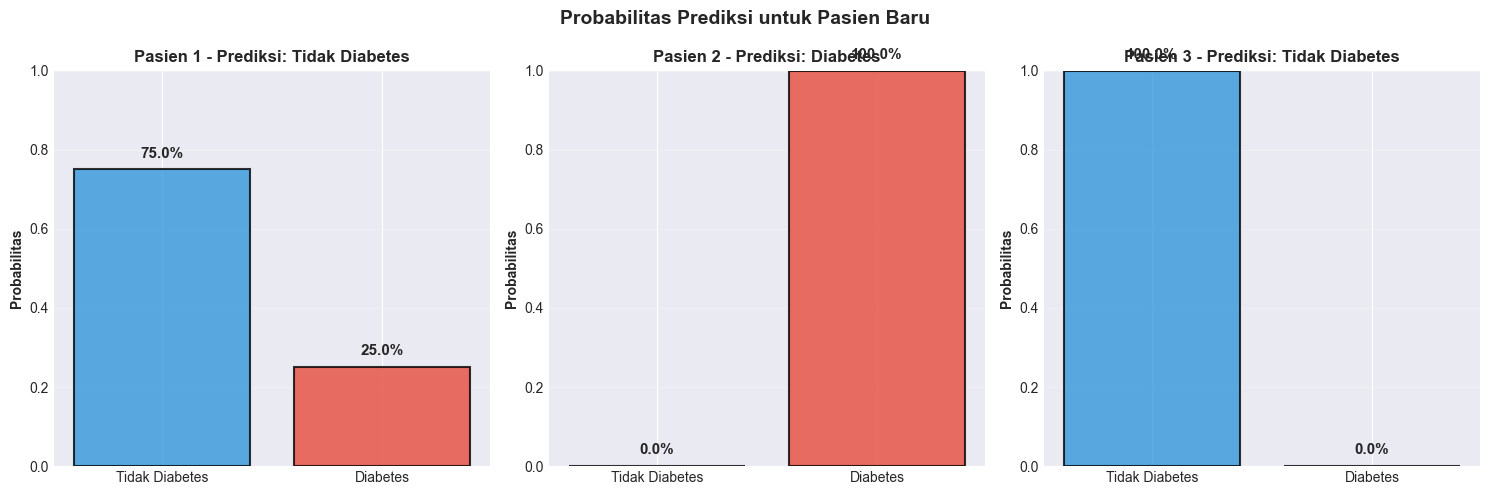

In [8]:
# ============================================================================
# BAGIAN 8: SIMULASI PREDIKSI DATA BARU (DEPLOYMENT)
# ============================================================================

print("\n" + "="*80)
print("BAGIAN 8: SIMULASI PREDIKSI UNTUK PASIEN BARU")
print("="*80)

# Membuat dummy data untuk 3 pasien baru
# Format: [Pregnancies, Glucose, BloodPressure, SkinThickness, Insulin, BMI, 
#          DiabetesPedigreeFunction, Age]

pasien_baru = pd.DataFrame({
    'Pregnancies': [2, 6, 0],
    'Glucose': [120, 180, 85],
    'BloodPressure': [70, 90, 66],
    'SkinThickness': [20, 35, 18],
    'Insulin': [80, 120, 0],
    'BMI': [25.0, 35.5, 22.5],
    'DiabetesPedigreeFunction': [0.35, 0.85, 0.20],
    'Age': [30, 55, 25]
})

print("\n[DATA PASIEN BARU]")
print(pasien_baru)

# PENTING: Scaling menggunakan scaler yang sama dari training
pasien_baru_scaled = scaler.transform(pasien_baru)

# Prediksi
prediksi = knn_final.predict(pasien_baru_scaled)
probabilitas = knn_final.predict_proba(pasien_baru_scaled)

# Hasil prediksi
print("\n" + "="*80)
print("HASIL PREDIKSI UNTUK PASIEN BARU")
print("="*80)

for i in range(len(pasien_baru)):
    status = "DIABETES POSITIF ⚠️" if prediksi[i] == 1 else "TIDAK DIABETES ✓"
    prob_negatif = probabilitas[i][0] * 100
    prob_positif = probabilitas[i][1] * 100
    
    print(f"\nPASIEN {i+1}:")
    print(f"  Usia: {pasien_baru.loc[i, 'Age']} tahun")
    print(f"  Glukosa: {pasien_baru.loc[i, 'Glucose']} mg/dL")
    print(f"  BMI: {pasien_baru.loc[i, 'BMI']}")
    print(f"  ─────────────────────────────────")
    print(f"  Prediksi: {status}")
    print(f"  Probabilitas Tidak Diabetes: {prob_negatif:.2f}%")
    print(f"  Probabilitas Diabetes: {prob_positif:.2f}%")

# Visualisasi probabilitas
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

for i in range(len(pasien_baru)):
    probs = [probabilitas[i][0], probabilitas[i][1]]
    colors = ['#3498db', '#e74c3c']
    
    axes[i].bar(['Tidak Diabetes', 'Diabetes'], probs, color=colors, 
                edgecolor='black', linewidth=1.5, alpha=0.8)
    axes[i].set_ylim(0, 1)
    axes[i].set_ylabel('Probabilitas', fontsize=10, fontweight='bold')
    axes[i].set_title(f'Pasien {i+1} - Prediksi: {"Diabetes" if prediksi[i]==1 else "Tidak Diabetes"}', 
                     fontsize=12, fontweight='bold')
    axes[i].grid(axis='y', alpha=0.3)
    
    # Tambahkan nilai di atas bar
    for j, prob in enumerate(probs):
        axes[i].text(j, prob + 0.03, f'{prob*100:.1f}%', ha='center', 
                    fontsize=11, fontweight='bold')

plt.suptitle('Probabilitas Prediksi untuk Pasien Baru', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()


In [13]:
# ============================================================================
# BAGIAN 9: KESIMPULAN
# ============================================================================

print("\n" + "="*80)
print("BAGIAN 9: KESIMPULAN AKHIR")
print("="*80)

print(f"""
[RINGKASAN HASIL PENELITIAN]

1. DATASET:
   - Total data: {len(df)} pasien
   - Training: {len(X_train)} pasien (80%)
   - Testing: {len(X_test)} pasien (20%)
   - Fitur: 8 indikator kesehatan
   - Target: Klasifikasi biner (Diabetes/Tidak)

2. PREPROCESSING:
   ✓ Handling zero values pada fitur medis
   ✓ Train-test split dengan stratifikasi
   ✓ Feature scaling menggunakan StandardScaler

3. MODEL OPTIMIZATION:
   - Metode: Elbow Method dengan K=1 hingga K=40
   - K Optimal: {optimal_k}
   - Metric: Euclidean Distance
   - Weights: Uniform

4. PERFORMA MODEL (K={optimal_k}):
   - Accuracy: {accuracy*100:.2f}%
   - Precision: {precision*100:.2f}%
   - Recall: {recall*100:.2f}%
   - F1-Score: {f1*100:.2f}%

5. EVALUASI KLINIS:
   - True Positive: {tp} kasus diabetes terdeteksi dengan benar
   - False Negative: {fn} kasus diabetes tidak terdeteksi (PERLU PERHATIAN!)
   - False Positive: {fp} prediksi diabetes yang salah
   - True Negative: {tn} kasus non-diabetes terdeteksi dengan benar

6. DEPLOYMENT:
   ✓ Model berhasil digunakan untuk prediksi pasien baru
   ✓ Output berupa prediksi kelas dan probabilitas
   ✓ Siap diimplementasikan sebagai sistem pendukung keputusan

[REKOMENDASI]
- Model ini dapat digunakan sebagai screening tool awal
- Kombinasikan dengan pemeriksaan medis lanjutan
- Pertimbangkan untuk meningkatkan Recall (mengurangi False Negative)
- Evaluasi ulang secara berkala dengan data baru
""")

print("\n" + "="*80)
print("PROGRAM SELESAI - TERIMA KASIH!")
print("="*80)


BAGIAN 9: KESIMPULAN AKHIR

[RINGKASAN HASIL PENELITIAN]

1. DATASET:
   - Total data: 768 pasien
   - Training: 614 pasien (80%)
   - Testing: 154 pasien (20%)
   - Fitur: 8 indikator kesehatan
   - Target: Klasifikasi biner (Diabetes/Tidak)

2. PREPROCESSING:
   ✓ Handling zero values pada fitur medis
   ✓ Train-test split dengan stratifikasi
   ✓ Feature scaling menggunakan StandardScaler

3. MODEL OPTIMIZATION:
   - Metode: Elbow Method dengan K=1 hingga K=40
   - K Optimal: 8
   - Metric: Euclidean Distance
   - Weights: Uniform

4. PERFORMA MODEL (K=8):
   - Accuracy: 76.62%
   - Precision: 71.43%
   - Recall: 55.56%
   - F1-Score: 62.50%

5. EVALUASI KLINIS:
   - True Positive: 30 kasus diabetes terdeteksi dengan benar
   - False Negative: 24 kasus diabetes tidak terdeteksi (PERLU PERHATIAN!)
   - False Positive: 12 prediksi diabetes yang salah
   - True Negative: 88 kasus non-diabetes terdeteksi dengan benar

6. DEPLOYMENT:
   ✓ Model berhasil digunakan untuk prediksi pasien b